<h1 style="color:#4FC3F7;">0. ¿QUÉ SE PIDE EXACTAMENTE EN ESTE PROYECTO?</h1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

<h2 style="color:#81C784;">0.1 Descripción</h2>


1. **El conjunto de datos clásico de rostros de Olivetti contiene 400 imágenes de rostros en escala de grises de 64 × 64 píxeles cada una. Cada imagen se aplana a un vector unidimensional de tamaño 4096.**

    Esto significa que cada imagen posee 4096 píxeles y que para poder trabajarla con algoritmos de machine learning, la representaremos como un vector unidimensional de longitud 4096, es decir, cada imagen pasa a ser un punto en un espacio de 4096 dimensiones.

2. **Se fotografiaron cuarenta personas diferentes (10 veces cada una), y la tarea habitual consiste en entrenar un modelo que pueda predecir qué persona aparece en cada imagen.**

    En el conjunto de datos aparecen 40 personas distintas y cada una fue fotografiada exactamente 10 veces.

    *aunque la tarea habitual con este conjunto de datos es entrenar un modelo de clasificación que identifique a qué persona pertenece cada imagen, el enfoque principal de este ejercicio no comienza con clasificación supervisada, sino con análisis exploratorio y aprendizaje no supervisado*


3. **Cargue el conjunto de datos mediante la función `sklearn.datasets.fetch_olivetti_faces()` y divídalo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de prueba (tenga en cuenta que el conjunto de datos ya está escalado entre 0 y 1).**

    Cuando en el enunciado se dice *"tenga en cuenta que el conjunto de datos ya está escalado entre 0 y 1"* significa que los valores numéricos de cada pixel, que originalmente están en un rango grande como 0 a 255 (escala de grises), ya fueron transformados para que todos queden dentro del intervalo de 0 a 1, donde 0 representa el negro absoluto y 1 representa el blanco absoluto, y los valores intermedios representarían distintos niveles de gris. 

    Esta normalización es importante porque los algoritmos de machine learning, especialmente los que dependen de distancias como K-Means y KNN, funcionan mucho mejor cuando todas las características están en una escala comparable, ya que si los valores fueran muy grandes podrian dominar las distancias y dismininuir la eficacia del aprendizaje. 

    Si en caso no hubiera estado normalizado, sería necesario dividir entre 255 o usar herramientas como <span style="color:#FFEB3B; font-weight:bold;">
    MinMaxScaler
    </span>

    SE ME VINO A LA CABEZA EL SIGUIENTE CONCEPTO: <span style="color:#FFEB3B; font-weight:bold;">
    StandardScaler
    </span>

    Lo usamos en el archivo *2_3_2_classfication_algorithms* para estandarizar el data set de iris. *Este caso es distinto*.

    Cuando usamos `StandardScaler()` en el dataset de Iris, lo que hicimos fue estandarizar las características para que cada una tuviera **media 0** y **desviación estándar 1**, evitando que una variable como el largo del pétalo dominara a otra como el ancho del sépalo en algoritmos que usan distancias o productos internos.

    En el dataset de Olivetti pasa algo parecido a lo que ocurre con Iris, aunque no exactamente de la misma forma. La idea general es la misma: evitar que algunas variables tengan más peso que otras al calcular distancias en métodos como K-Means o KNN.

    La diferencia es que, en imágenes, los datos ya vienen preparados. Cada píxel está reescalado entre 0 y 1, lo que equivale a una normalización tipo Min–Max. Con eso es suficiente para que todos los píxeles estén en la misma escala y ninguno distorsione las distancias.

    Además, en este caso no tendría mucho sentido usar StandardScaler, porque en imágenes el valor absoluto del píxel sí importa: representa qué tan oscuro o claro es un punto. Centrar los valores en cero o cambiar su varianza haría perder ese significado. Por eso, scikit-learn ya entrega el dataset normalizado, y no es necesario aplicar ninguna estandarización adicional.


4. **Dado que el conjunto de datos es bastante pequeño, probablemente desee utilizar un muestreo estratificado para garantizar que haya el mismo número de imágenes por persona en cada conjunto.** 

    El dataset es pequeño, así que si lo dividimos en entrenamiento y prueba de manera totalmente aleatoria, puede pasar que:
    - Algunas personas tengan muchas imágenes en entrenamiento y casi ninguna en prueba
    - O incluso que alguna persona no aparezca en uno de los conjuntos

    El <span style="color:#FFEB3B; font-weight:bold;">
    muestreo estratificado
    </span> quiere decir que, al hacer la división, nos aseguramos de que cada persona esté representada de forma equilibrada en ambos conjuntos. Si una persona tiene 10 imágenes en total el muestreo estratificado puede garantizar que: 7 vayan a entrenamiento y 3 vayan a prueba

    Y eso se hace para todas las personas, no solo para algunas.

    En nuestro caso, cada persona tiene 10 imágenes y si en caso definamos una división 70 % entrenamiento / 30 % prueba, entonces con muestreo estratificado ocurre lo siguiente:
    Para cada una de las 40 personas: 7 imágenes van a entrenamiento y 3 imágenes van a prueba



5. **A continuación, agrupe las imágenes mediante K-Means y asegúrese de tener un buen número de clústeres (utilizando una de las técnicas descritas en este capítulo). Visualice los clústeres: ¿observa rostros similares en cada uno? Comente y explique lo que observa.**

<h1 style="color:#4FC3F7;">1. Analisis de la libreria</h1>

In [2]:
from sklearn.datasets import fetch_olivetti_faces

Aquí estamos importando una función específica de scikit-learn cuyo único propósito es traer el dataset Olivetti ya listo para trabajar, igual que cuando usamos load_iris() para Iris; la diferencia es que aquí no son flores con 4 variables, sino imágenes.

In [3]:
olivetti = fetch_olivetti_faces()

Esta línea descarga y carga el dataset en memoria, y lo guarda en un objeto tipo <span style="color:#FFEB3B; font-weight:bold;"> “Bunch” </span>, que es básicamente un contenedor con varios elementos dentro, parecido a un diccionario pero con acceso por puntos; esto es importante porque no devuelve solo una matriz, sino varias representaciones del mismo conjunto de datos pensadas para distintos usos.

In [4]:
X = olivetti.data # (400, 4096)
print(X, "\n") 
print(X.shape)

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] 

(400, 4096)


Aquí ocurre algo clave: *X contiene las imágenes ya aplanadas*, es decir, cada imagen 64×64 fue convertida en un vector de 4096 números, por lo que X tiene forma **(400, 4096) = 400 filas (instancias) y 4096 columnas**

**SI, SON NUMEROS QUE VAN DEL 0 AL 1 Y NO DE 0 A 255, RECUERDA QUE YA FUERON ESCALADOS**

Esto es exactamente lo que necesitan algoritmos como K-Means, KNN o GMM, porque estos algoritmos no entienden imágenes, solo entienden puntos en un espacio numérico, igual que en Iris cada flor era un punto en un espacio de 4 dimensiones, aquí cada rostro es un punto en un espacio de 4096 dimensiones.

In [5]:
y = olivetti.target # etiquetas reales (0 a 39)

Esto guarda las etiquetas reales, es decir, a qué persona pertenece cada imagen, con valores del 0 al 39; esto NO se usa en K-Means, pero sí será fundamental más adelante cuando hagamos validación, comparación con clustering o clasificación con KNN, esto representa “la verdad” que el algoritmo no supervisado todavía no conoce.

In [6]:
images = olivetti.images # (400, 64, 64)

Esta línea es muy importante conceptualmente: aquí tenemos las mismas imágenes, pero en su forma original 64×64, lo cual sirve únicamente para visualizar, no para entrenar modelos.

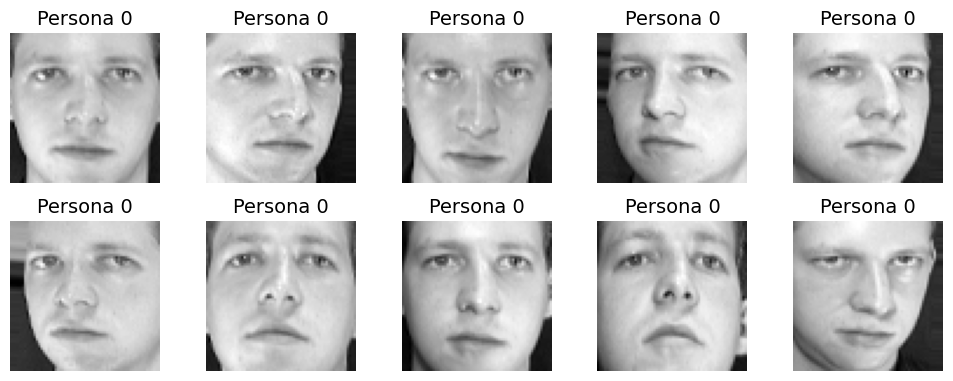

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4)) # 2 filas, 5 columnas. figsize significa tamaño de la figura
# axes = Es una matriz 2D (arreglo 2 filas × 5 columnas) de ejes. Cada elemento es un subgráfico. Son los cuadros vacios donde se mostrarán las imágenes.

axes = axes.ravel() # Convierte la matriz 2D de ejes (2×5) en un arreglo 1D. Osea los cuadros vacios se ponen en una sola fila. xD

for i in range(10):
    axes[i].imshow(images[i], cmap="gray") # Muestra la imagen en escala de grises
    axes[i].set_title(f"Persona {y[i]}") # Título con la etiqueta de la persona
    axes[i].axis("off") # Oculta los ejes (valores y bordes)

plt.tight_layout()
plt.show()

Este código crea una cuadrícula de imágenes en escala de grises, mostrando las primeras diez imágenes del conjunto de datos junto con sus etiquetas reales, organizadas en una figura de 2 filas por 5 columnas.

El joven de la foto da miedito:0

<h1 style="color:#4FC3F7;">2. Estratificando los datos</h1>

Necesitamos separar los datos, no porque K-Means lo necesite (no usa etiquetas), sino porque el proyecto completo sí las va a necesitar más adelant. Aquí aparece el concepto de muestreo estratificado, que ya conocemos de otros datasets como Iris o Titanic, pero aplicado a imágenes.

La línea clave es importar la herramienta correcta:

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

Usamos esta clase porque queremos mezclar aleatoriamente los datos, pero sin perder la proporción de clases, es decir, asegurándonos de que cada persona (clase 0 a 39) aparezca el mismo número de veces en entrenamiento, validación y prueba, tal y como se indica en el enunciado del proyecto.

Si no hiciéramos esto podría ocurrir que una persona quede con muy pocas imágenes en alguno de los conjuntos, lo cual es un error grave en un dataset bastante pequeño.

Ahora definimos el <span style="color:#FFEB3B; font-weight:bold;">primer split</span>:

In [9]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

<h2 style="color:#81C784;">2.1 Problema a resolver</h2>

El data set será divido en 3 debido a que servirán como: **Entrenamiento (train)** = el modelo aprende. **Validación (validation)** = elegir hiperparámetros y comparar modelos. **Prueba (test**) = evaluación final

<h2 style="color:#81C784;">2.2 ¿Qué es StratifiedShuffleSplit?</h2>

Es un herramienta que hace dos cosas al mismo tiempo: <span style="color:#FFEB3B; font-weight:bold;"> Shuffle (baraja) </span> los datos aleatoriamente y <span style="color:#FFEB3B; font-weight:bold;"> Stratified (estratifica)</span> = mantiene la proporción de clases

`n_splits = 1` significa que solo queremos una partición aleatoria, `test_size = 0.3` indica que el 30% de los datos se separará inicialmente. El 30% de las imágenes se separa, pero de forma estratificada. 

Como tenemos 10 imágenes por persona, el 30% implica:
- 3 imágenes por persona = al bloque reservado
- 7 imágenes por persona = se quedan para entrenamiento provisional

| Persona  | Total | Train provisional | Bloque reservado |
| -------- | ----- | ----------------- | ---------------- |
| Clase 0  | 10    | 7                 | 3                |
| Clase 1  | 10    | 7                 | 3                |
| ...      | ...   | ...               | ...              |
| Clase 39 | 10    | 7                 | 3                |

- **Train provisional: 280 imágenes**
- **Bloque reservado: 120 imágenes**

Cada persona aparece exactamente el mismo número de veces

Este 30% no es aún el test final, sino un bloque que luego dividiremos en validación y prueba.

In [10]:
for train_idx, temp_idx in splitter.split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] # Aca va el 70% para entrenamiento
    X_temp, y_temp = X[temp_idx], y[temp_idx] # Aca va el 30% para validacion + testeo



```python
- for train_idx, temp_idx in splitter.split(X, y):
```
Esta línea es fundamental porque aquí sí usamos $y$, no para entrenar nada, sino únicamente para que el split sea estratificado. Esto es totalmente valido, usar las etiquetas para dividir datos no rompe el enfoque no supervisado, porque no se están usando para aprender patrones, solo para repartir equitativamente las muestras.

```python
- X_train, y_train = X[train_idx], y[train_idx]
```

Aquí estamos construyendo el conjunto de entrenamiento, que contendrá aproximadamente el 70% de los datos, es decir, unas 280 imágenes, manteniendo exactamente 7 imágenes por persona, TAL Y COMO SE EXPLICO ANTERIORMENTE. Este conjunto será el que más adelante usemos para ajustar K-Means, GMM y entrenar KNN.

```python
- X_temp, y_temp = X[temp_idx], y[temp_idx]
```

Este conjunto temporal contiene el 30% restante, unas 120 imágenes, y lo guardamos aparte porque todavía no hemos decidido cuáles serán validación y cuáles prueba.



Ahora repetimos el proceso para dividir ese conjunto temporal con el <span style="color:#FFEB3B; font-weight:bold;">segundo split</span>:

In [11]:
splitter_val_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

Aquí `test_size = 0.5` significa que el conjunto temporal se divide en dos mitades iguales, quedando aproximadamente 60 imágenes para validación y 60 para prueba, es decir, alrededor de 1 o 2 imágenes por persona en cada uno; esto es coherente con el tamaño reducido del dataset. Quedaría así:

| Persona  | Train | Val | Test | Total |
| -------- | ----- | --- | ---- | ----- |
| Clase 0  | 7     | 1   | 2    | 10    |
| Clase 1  | 7     | 2   | 1    | 10    |
| ...      | ...   | ... | ...  | ...   |
| Clase 39 | 7     | 1–2 | 1–2  | 10    |



In [12]:
for val_idx, test_idx in splitter_val_test.split(X_temp, y_temp):
    X_val, y_val = X_temp[val_idx], y_temp[val_idx] # Aca va el 15% para validacion
    X_test, y_test = X_temp[test_idx], y_temp[test_idx] # Aca va el 15% para testeo

Y con esto ya tenemos los tres conjuntos bien definidos, balanceados y listos para experimentar.

<h1 style="color:#4FC3F7;">3. Primera aplicación de K-Means</h1>

En este paso vamos a aplicar K-Means por primera vez, pero no para quedarnos con un único resultado, sino para experimentar, igual que cuando en `make_blobs` prbamos distintos valores de k y mirabamos cómo cambiaban los grupos.

Aquí la diferencia es que ya no podemos dibujar puntos en el plano, así que nuestras “gráficas” pasan a ser métricas **(elbow, silhouette)** y visualizaciones de rostros.

In [13]:
from sklearn.cluster import KMeans

En esta primera prueba <span style="color:#FFEB3B; font-weight:bold;">NO vamos a usar PCA</span>, porque queremos ver cómo se comporta K-Means en el espacio original de 4096 dimensiones, este resultado inicial será nuestro <span style="color:#FFEB3B; font-weight:bold;">baseline conceptual</span>.

<h2 style="color:#81C784;">3.1 Primer código - Modelo clásico</h2>


In [14]:
k = 40
kmeans = KMeans(n_clusters=40, random_state=42)
kmeans.fit(X_train)
kmeans.inertia_

8219.3046875

Empezamos probando un valor de k razonable, `k = 40`, que coincide con el número real de personas, es una referencia intuitiva para comparar.

Cuando escribimos `kmeans = KMeans(n_clusters=40, random_state=42)` estamos creando el modelo indicando cuántos clústeres queremos y se fija el `random_state = 42`. Algo que ya conocemos porque K-Means depende de puntos iniciales aleatorios y distintos arranques pueden dar resultados distintos. Luego usamos `kmeans.fit(X_train)`, y aquí ocurre el aprendizaje no supervisado: 

El algoritmo solo ve los vectores de píxeles, no sabe nada de personas, y empieza a mover los centroides para minimizar la suma de distancias cuadradas dentro de cada clúster; este proceso iterativo es el mismo que vimos en ejemplos 2D, solo que ahora ocurre en un espacio de muy alta dimensión. 

Después, cuando accedemos a `kmeans.inertia_`, estamos obteniendo una cantidad clave: la inercia que será el eje central del método del codo. Conceptualmente, la inercia juega el mismo papel que “qué tan bien están separados los grupos” cuando mirabamos visualmente los puntos en el plano.

Aunque en esta ocasión en la que no asignamos variables extras en KMeans(), se esta tomando en cuenta que:
```python
KMeans(
    n_clusters=40,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)
```

Es algo a tener en cuenta

<h2 style="color:#81C784;">3.2 Segundo código - Metodo del codo</h2>


En lugar de probar un solo k, vamos a probar muchos valores de k y guardar la inercia para cada uno, porque K-Means siempre mejora (reduce inercia) cuando aumentamos k, pero llega un punto donde la mejora deja de ser significativa. Esto es exactamente la idea del método del codo.

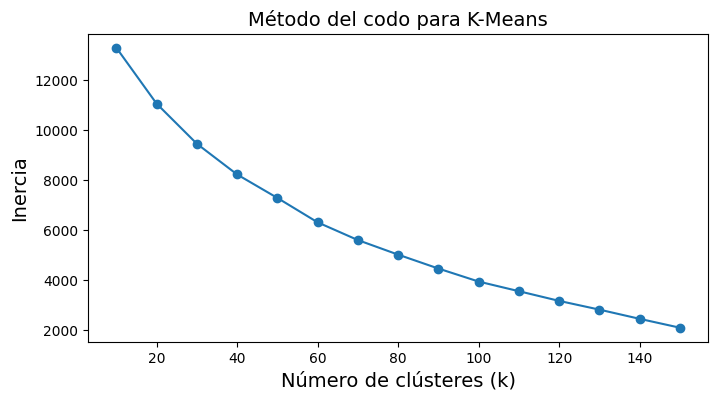

In [15]:
inertias = []
k_values = range(10, 151, 10) # Inicializa en 10, termina en 151, con paso de 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.title("Método del codo para K-Means")
plt.show()


Usamos explícitamente K-Means++, que es una mejora del K-Means clásico que inicializa mejor los centroides para evitar soluciones pobres.

Cuando observamos la gráfica del codo, lo importante no es encontrar un “punto exacto”, sino identificar una región donde la curva deja de bajar bruscamente y empieza a aplanarse. Ese punto indica que aumentar k ya no aporta una mejora significativa en la compactación de los clústeres. Aunque hay 40 personas, el número óptimo de clústeres según la inercia puede ser menor o mayor, porque K-Means no agrupa identidades, sino similitudes visuales, como iluminación, orientación o expresiones faciales.

<h2 style="color:#81C784;">3.3 Tercer código - Metodo del Coeficiente de Silhouette</h2>


La inercia siempre disminuye cuando aumentamos k, así que el codo no siempre es claro, especialmente en datos complejos como imágenes. 

Por eso entra en juego el <span style="color:#FFEB3B; font-weight:bold;">silhouette score</span>, que no mide una unión interna como la inercia, sino algo conceptualmente más eficiente: mide qué tan parecido es cada punto a su propio clúster comparado con los clústeres vecinos, es decir, combina consistencia interna y separación entre grupos, exactamente lo que queríamos ver cuando dibujamos puntos y mirabamos si estaban bien separados.

In [16]:
from sklearn.metrics import silhouette_score

Importamos una métrica que no necesita etiquetas reales.

El código será el siguiente:

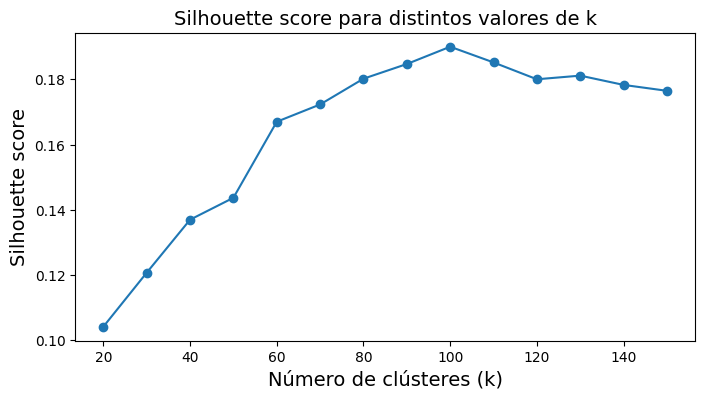

In [17]:
silhouette_scores = []
k_values = range(20, 151, 10) # Inicializa en 20, termina en 121, con paso de 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score para distintos valores de k")
plt.show()


Al elegir 
```python
for k in range(20, 151, 10)
``` 
no estamos eligiendo números al azar, sino explorando un rango razonable donde esperamos que nos de informacion valiosa. y cada vez que llamamos a 
```python
kmeans.fit_predict(X_train) 
``` 
obtenemos directamente la asignación de clúster para cada imagen, que luego usamos para calcular
```python
silhouette_score(X_train, labels)
``` 


Conceptualmente, si el silhouette score es cercano a 1, significa que los puntos están muy bien agrupados. Si es cercano a 0, los clústeres se solapan o soperponen, y si es negativo, algo salió muy mal, lo cual es una señal inmediata de que ese valor de k no tiene sentido.

Cuando finalmente graficamos silhouette score versus k, esta gráfica cumple el mismo rol que cuando comparabamos accuracy o F1-score para distintos hiperparámetros:

**nos permite justificar con evidencia por qué eligimos un valor de k y no otro**

En el **grafico del codo**, apartir de $k = 100$ la incercia comienza a estabilizarse. Ademas en la **grafica de silhoutte**, el silhoutte score mas cercano a 1 es 0.18 cuando $k=100$. 

<span style="color:#FFEB3B; font-weight:bold;"> Esto nos permite decir que el mejor silhouette score no está exactamente en k = 40, lo que quiere decir que K-Means no está descubriendo identidades, sino patrones visuales compartidos entre personas distintas. 
</span>

<span style="color:#FFEB3B; font-weight:bold;"> Por tanto, se concluye que se utilizará k = 100 como número final de clústeres
</span>





<h2 style="color:#81C784;">3.4 Cuarto código - Primer modelo</h2>


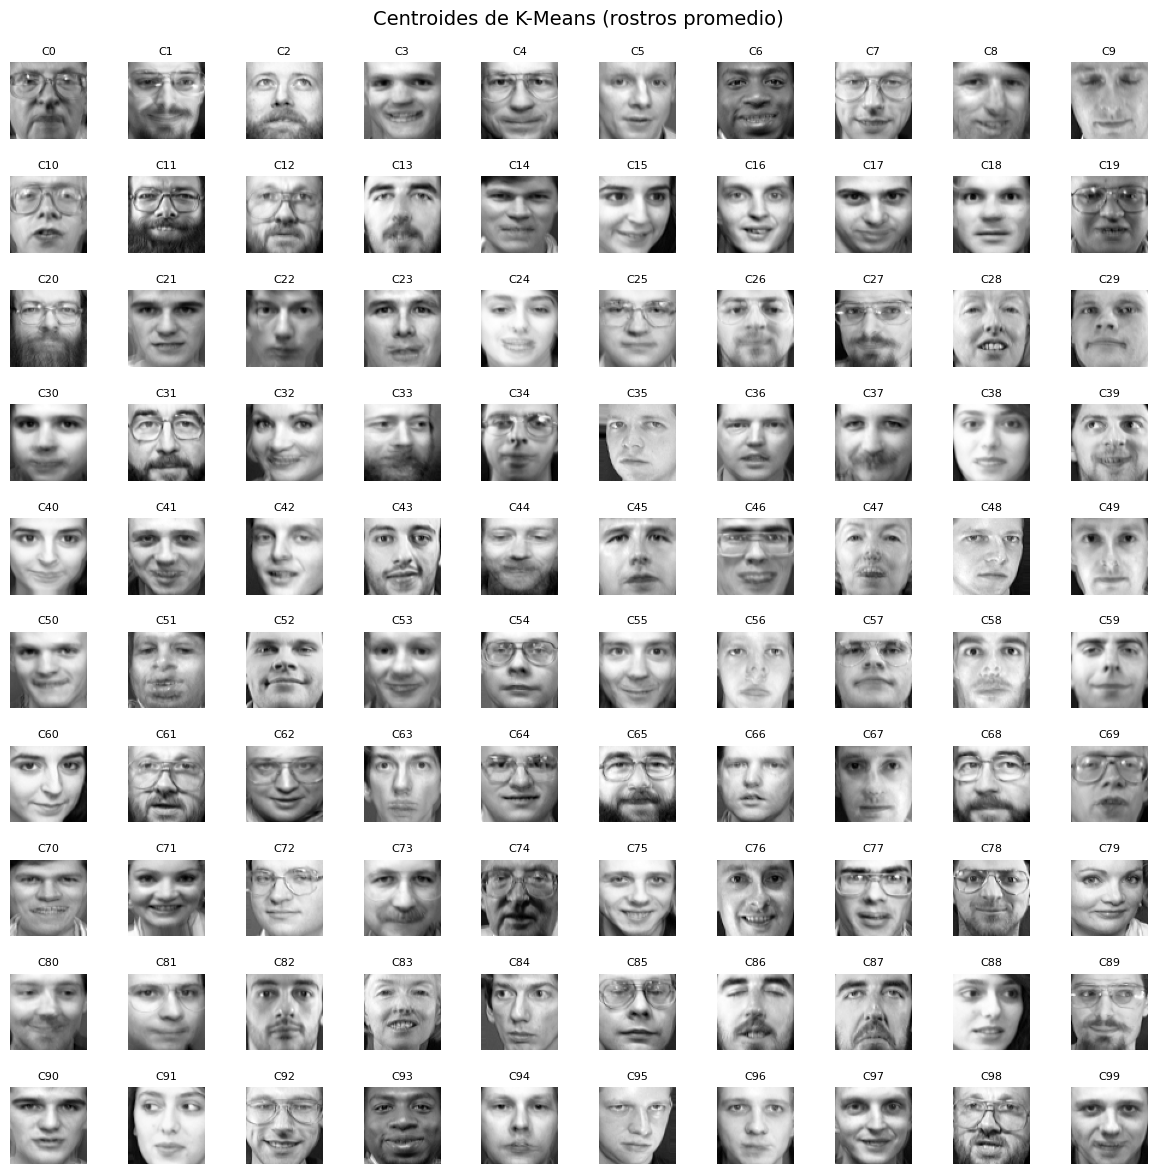

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Decidimos usar k = 100

k = 100
kmeans = KMeans(
    n_clusters=k,
    init="k-means++", # esta inicialización coloca los centroides iniciales de forma más inteligente que el método aleatorio, acelerando la convergencia y mejorando la estabilidad :D
    n_init=20, # ejecuta el algoritmo varias veces con distintas inicializaciones para así quedarnos con la mejor solución
    random_state=42
)

kmeans.fit(X_train) # el algoritmo analiza las imágenes aplanadas de tamaño 4096 y aprende 100 centroides que representan patrones visuales dominantes

# Etiquetas de clúster para cada imagen
labels = kmeans.labels_ # obtenemos, para cada imagen, el número de clúster al que pertenece, lo cual es fundamental porque nos permite agrupar imágenes similares
#tiene la misma longitud que X_train y en cada posición guarda el número de clúster asignado a esa imagen. Es decir, si labels[i] = 10, significa que la imagen X_train[i] pertenece al clúster 10.

# Centroides (rostros promedio)
centroids = kmeans.cluster_centers_ # cada centroide es un vector de 4096 dimensiones que representa el "rostro promedio" de ese clúster específico



# ----------- VISUALIZAR ALGUNOS O TODOS LOS CENTROIDES -----------

fig, axes = plt.subplots(10, 10, figsize=(12, 12)) # creando una grilla de 50 imágenes, 5 filas y 10 columnas. crea los cuadros vacios donde se mostrarán las imágenes
axes = axes.ravel() # Convierte la matriz 2D de ejes (2×5) en un arreglo 1D. Osea los cuadros vacios se ponen en una sola fila. xD

for i in range(100):
    axes[i].imshow(centroids[i].reshape(64, 64), cmap="gray") # reshape(64, 64) convierte el vector de 4096 dimensiones de cada centroide en una imagen 64x64 píxeles
    axes[i].axis("off")
    axes[i].set_title(f"C{i}", fontsize=8)

plt.suptitle("Centroides de K-Means (rostros promedio)", fontsize=14)
plt.tight_layout()
plt.show()


# PARA OBSERVAR CIERTA CANTIDAD DE CENTROIDCES, NECESITAMOS CAMBIAR DOS COSAS:
# 1. Cambiar el tamaño de la figura (figsize) para que se acomoden mejor (10,10 es bueno para 100 centroides o (5,10) para 50 centroides)
# 2. Cambiar el rango del for para que muestre la cantidad deseada de centroides (100 para todos los centroides o 50 para la mitad)


En este bloque hemos aplicando K-Means como técnica de clustering no supervisado sobre imágenes, donde cada imagen del conjunto de entrenamiento ya fue aplanada en un vector de 4096 píxeles. Al fijar k = 100, forzamos al algoritmo a encontrar 100 patrones visuales distintos, que llamamos centroides, que representan “rostros promedio” construidos a partir de similitudes globales como iluminación, orientación o forma del rostro, no identidades reales. El uso de `init = "k-means++` y `n_init = 20` asegura que estos patrones sean estables y no dependan de una mala inicialización, mientras que `random_state = 42` permite reproducir exactamente el mismo resultado.

Una vez entrenado el modelo con `fit(X_train)`, obtenemos dos resultados clave: **labels**, que indica a qué clúster pertenece cada imagen real, y **centroids**, que contiene los 100 vectores (imagenes de 4096 valores) promedio aprendidos por el algoritmo. Al visualizarlos con `plt.subplots(10, 10)` y `reshape(64, 64)`, estamos haciendo el proceso inverso al preprocesamiento original: pasamos de un vector numérico de alta dimensión a una imagen interpretable. Esta visualización es crucial porque permite ver qué tipo de patrones está aprendiendo K-Means, confirmando que el algoritmo agrupa por similitud visual y no de injusta.

**Un punto clave que ya empieza a quedar claro aquí es que ver 100 centroides no implica que cada clúster contenga la misma cantidad de imágenes reales. Los centroides siempre existen porque ñps forzamos al fijar k = 100, pero las imágenes del dataset no se reparten de forma uniforme entre ellos. K-Means no intenta equilibrar cantidades, sino minimizar distancias: algunos centroides terminan representando patrones muy comunes y concentran muchas imágenes, mientras que otros capturan rasgos más específicos y pueden quedar asociados a muy pocas imágenes.** ESTO LO VEREMOS EN EL SIGUIENTE CODIGO

Además, es importante recordar que no estamos usando todas las caras del dataset, sino únicamente `X_train`, que es el subconjunto de entrenamiento. Que corresponde a 280 imagenes o 7 por cada clase. Por lo tanto es completamente normal que al aumentar k (por ejemplo, pasar de k = 40 a k = 100) algunos clústeres queden con muy pocas imágenes o incluso con solo unas cuantas que encajan muy bien con ese patrón visual específico.

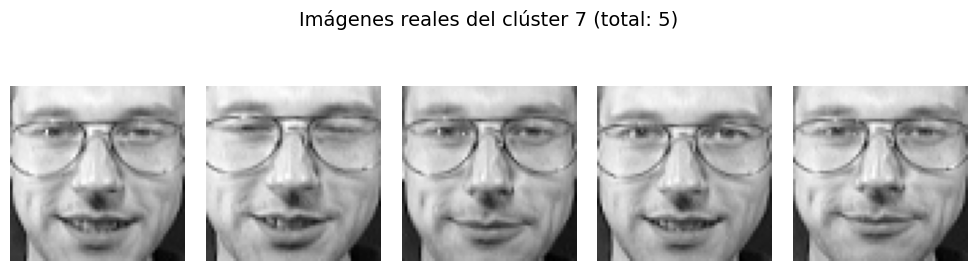

In [19]:
# ----------- VISUALIZAR IMÁGENES REALES DE UN CLÚSTER -----------

# Seleccionamos un clúster
cluster_id = 7
images_in_cluster = X_train[labels == cluster_id]

# Número real de imágenes disponibles
n_images = min(len(images_in_cluster), 10)

fig, axes = plt.subplots(1, n_images, figsize=(2 * n_images, 3)) # truqito para ajustar el tamaño de la figura según la cantidad de imágenes

# Si solo hay una imagen, axes no es iterable, así que lo corregimos
if n_images == 1:
    axes = [axes]

for i in range(n_images):
    axes[i].imshow(images_in_cluster[i].reshape(64, 64), cmap="gray")
    axes[i].axis("off")

plt.suptitle(f"Imágenes reales del clúster {cluster_id} (total: {len(images_in_cluster)})", fontsize=14)
plt.tight_layout()
plt.show()


Aquí la idea central del código es responder de forma visual a la pregunta “qué hay realmente dentro de un clúster”, sin asumir que todos tienen el mismo tamaño. 

Primero elegimos un `cluster_id`, que representa uno de los grupos aprendidos por K-Means, y luego usamos una <span style="color:#FFEB3B; font-weight:bold;">  indexación booleana 
</span> `(labels == cluster_id)` de NumPy, una técnica clave en ciencia de datos. La expresión labels == cluster_id crea una máscara de valores True y False, y NumPy devuelve solo las filas de `X_train` que pertenecen a ese clúster. Así obtenemos todas las imágenes que K-Means que se consideran similares entre sí.

Luego aparece una decisión muy importante desde el punto de vista práctico: `n_images = min(len(images_in_cluster), 10)`. Aquí estamos imponiendo una regla de visualización, no de modelado. No importa si el clúster tiene 3, 7 o 25 imágenes: solo mostraremos hasta 10, pero nunca intentaremos mostrar más imágenes de las que existen realmente, evitando errores. Al crear la figura con una sola fila y `n_images` columnas, el layout se adapta dinámicamente al tamaño real del clúster, y el bloque `if n_images == 1` actúa como una protección frente a un detalle interno de Matplotlib: cuando solo hay un subplot, no devuelve una lista, sino un objeto único.

Finalmente, el `bucle for` reconstruye cada imagen desde su forma vectorial (4096 valores) a su forma espacial original (64×64). Algo que siempre es bueno recordar es que K-Means aprende en un espacio numérico de alta dimensión, pero nosotros interpretamos sus resultados visualmente. 

**En este caso por ejemplo elegimos el cluster 7. En total son unas 5 imagenes que corresponden a este cluster.**

**Seguramente las 5 faltantes se encuentren en otro cluster o en los otros valores repartidos entre `X_val` y `X_test`**

**Y así podemos seguir observando cluster por cluster y notar que nuestro modelo trabaja de manera muy buena, tal y como es el caso que presentamos (cluster 7)**

**VEAMOS PUES UNA IMAGEN DE ALGUNOS CLUSTERES CON SUS RESPECTIVAS IMAGENES**

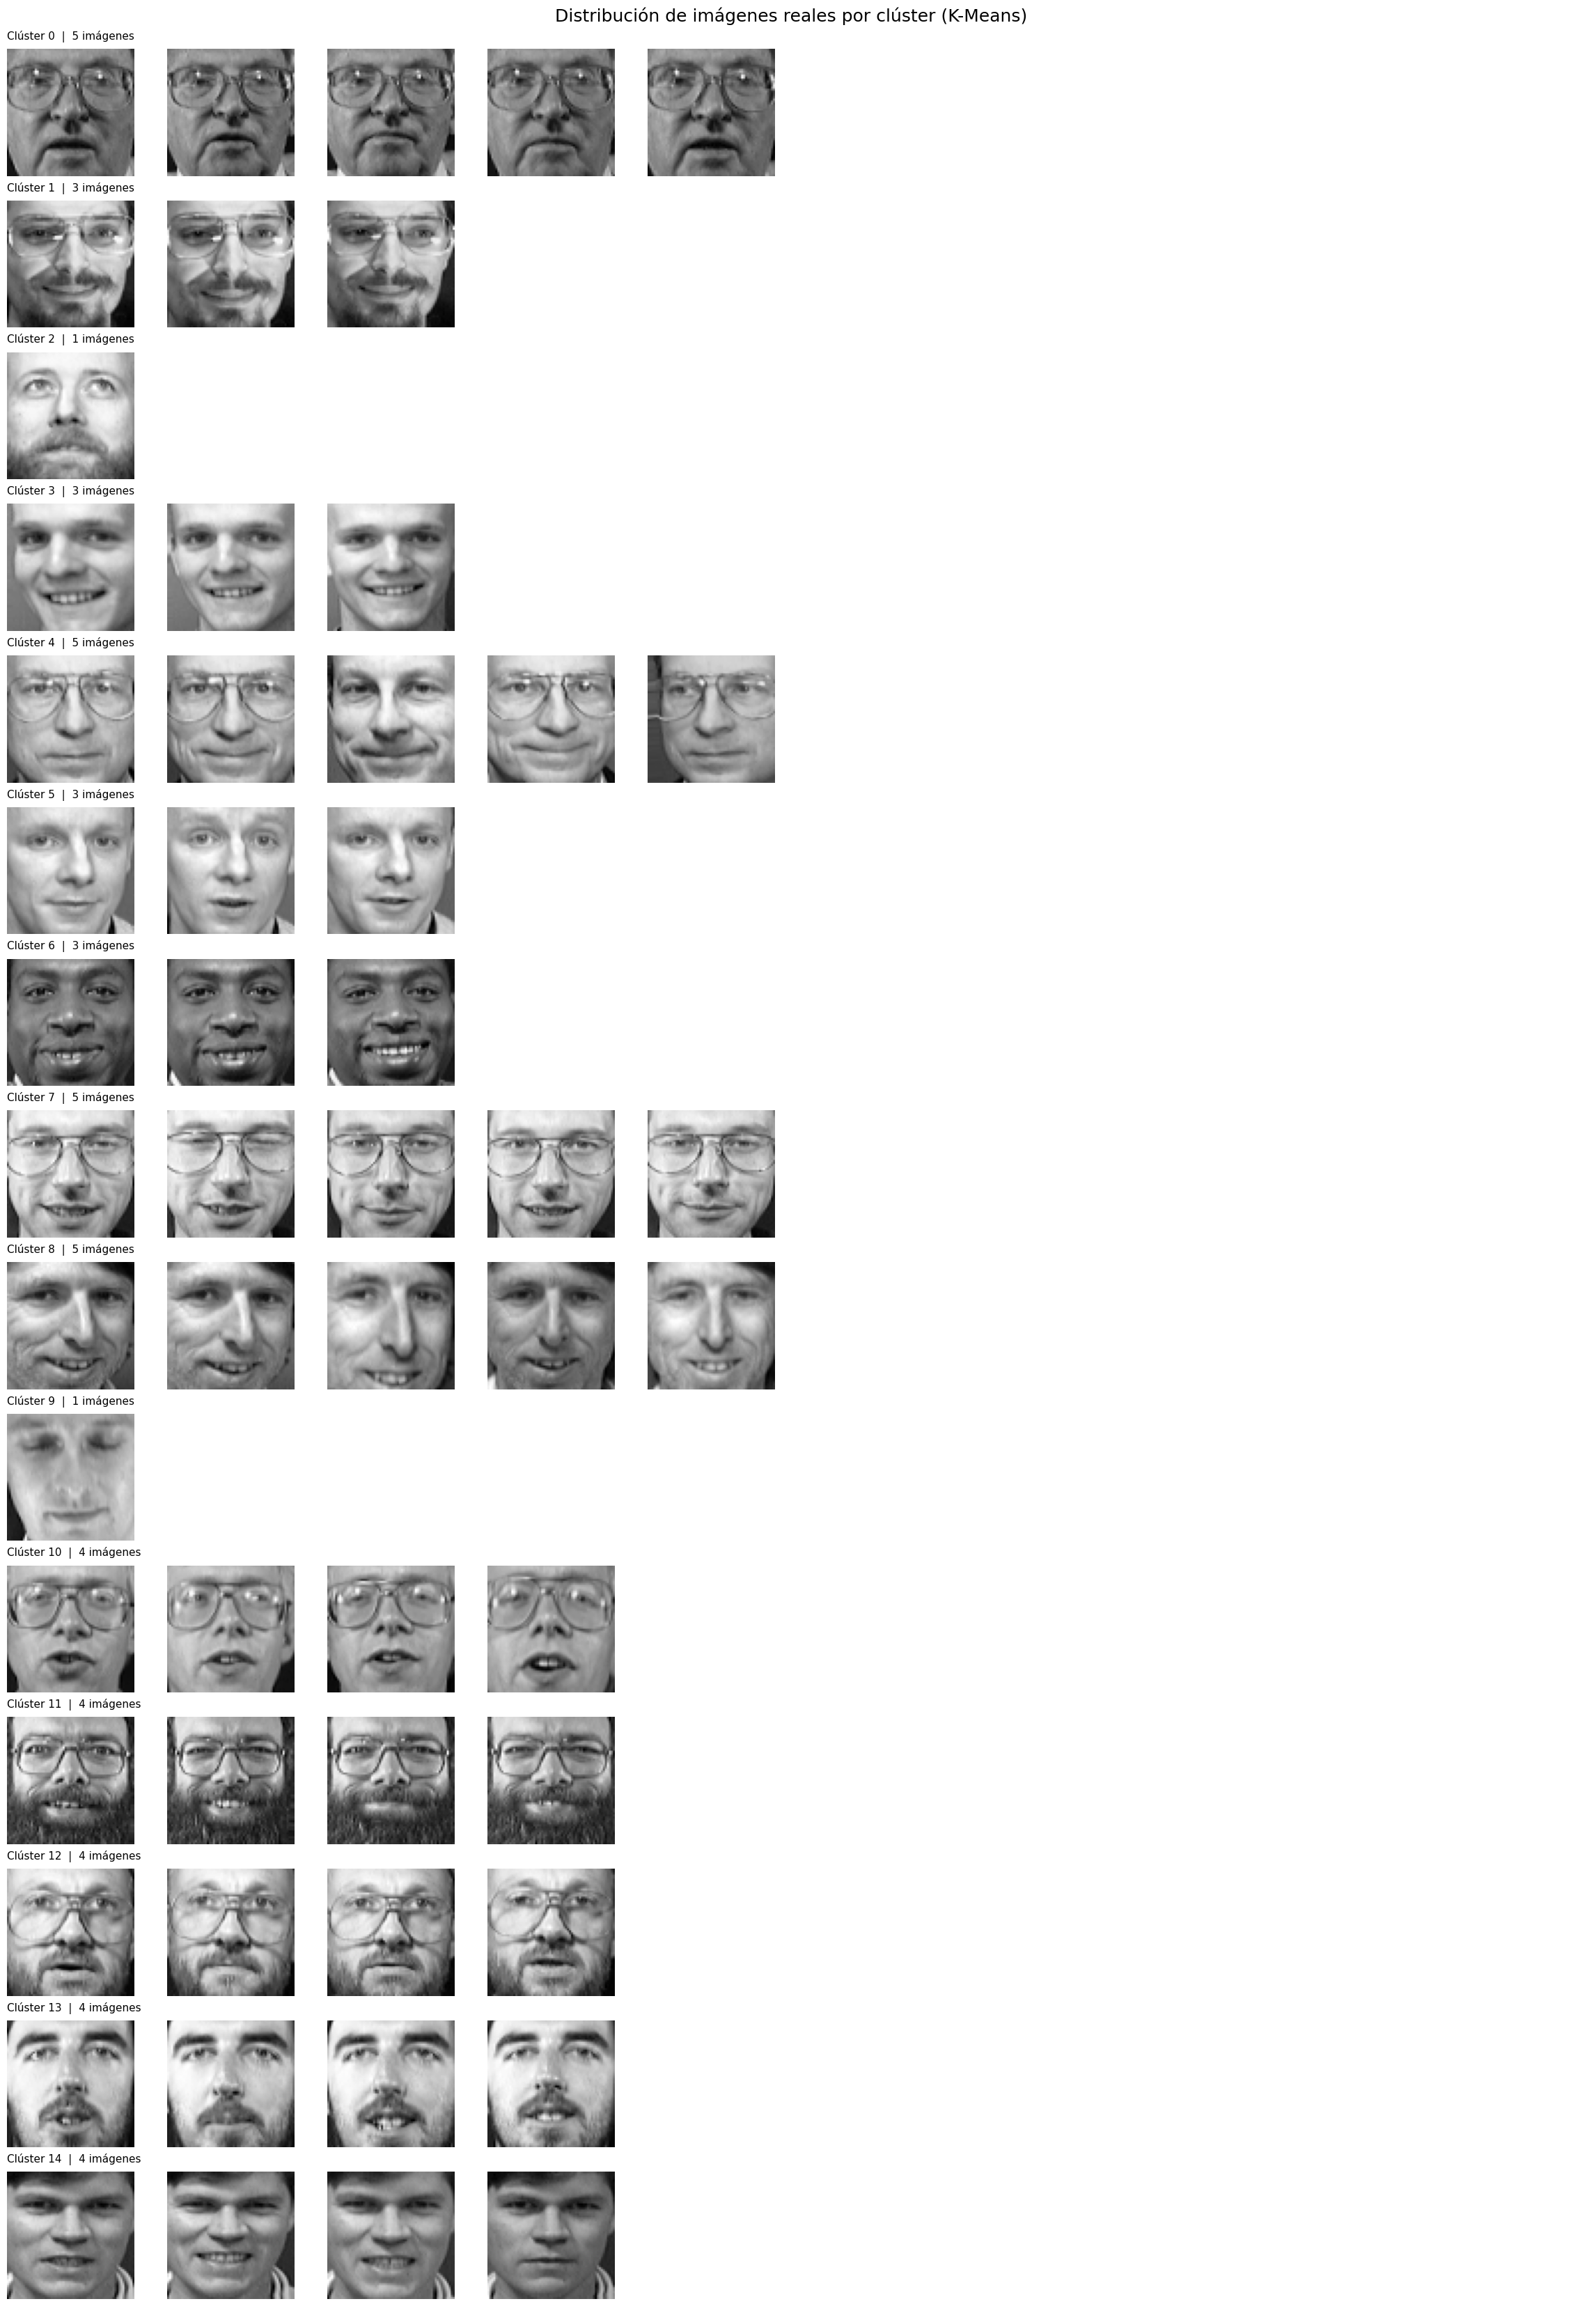

In [20]:
# ----------- TABLA ORDENADA DE CLÚSTERES (UNA SOLA IMAGEN) -----------

n_clusters_to_show = 15   # clústeres a mostrar
max_images = 10           # imágenes por clúster

fig, axes = plt.subplots(
    n_clusters_to_show,
    max_images,
    figsize=(2.3 * max_images, 2.2 * n_clusters_to_show),
    constrained_layout=True
)

for row, cluster_id in enumerate(range(n_clusters_to_show)):

    images_in_cluster = X_train[labels == cluster_id]
    n_images = min(len(images_in_cluster), max_images)

    for col in range(max_images):
        ax = axes[row, col]

        if col < n_images:
            ax.imshow(images_in_cluster[col].reshape(64, 64), cmap="gray")

        ax.axis("off")

        # Título solo en la primera imagen de cada fila
        if col == 0:
            ax.set_title(
                f"Clúster {cluster_id}  |  {len(images_in_cluster)} imágenes",
                fontsize=11,
                loc="left",
                pad=10
            )

plt.suptitle(
    "Distribución de imágenes reales por clúster (K-Means)",
    fontsize=18
)
plt.show()




Con ayuda de Chat gpt pude crear este codigo mostrar de manera ordenada los primeros 15 clusters y sus respectivas imagenes. ES SIMPLEMENTE MOSTRAR LO QUE MOSTRAMOS ANTERIORMENTE CON EL CLUSTER 7, PERO AHORA CON LOS 15 PRIMEROS.

**Esta imagen nos muestra que el modelo esta trabajando correctamente, PERO, COMO SABER EXACTAMENTE ESO?** - **EN ESTA OCASIÓN NO PODRE RESPONDER A ESTA PREGUNTA :C*

**¿ SERA POSIBLE CREAR UN MODELO QUE DIVIDA EXACTAMENTE LAS 40 CLASES DE PERSONAS CON SUS 10 IMAGENES TOMADAS ?**

<h2 style="color:#81C784;">3.5 Dudas existenciales de esta primera aplicación de K-Means (Solo probamos 280 imagenes del total xd)</h2>


K-Means no está tratando de separar las imágenes por persona, porque el problema que resolvemos aquí es no supervisado. El algoritmo no sabe que existen 40 personas, no conoce identidades ni etiquetas, lo único que ve son vectores de 4096 números (los píxeles de cada imagen) y su objetivo matemático es agrupar imágenes que se parezcan visualmente, minimizando la distancia a un centroide. Por eso, cuando eliges `k = 100`, no le estamos diciendo “encuentra 100 personas”, sino “encuentra 100 patrones visuales dominantes”, como iluminación, orientación del rostro, sombras o expresiones.

Debido a esto, los clústeres no tienen el mismo tamaño y no contienen siempre 10 imágenes. En un mismo clúster pueden aparecer personas distintas con apariencia similar, y una misma persona puede quedar repartida en varios clústeres si sus fotos cambian mucho. Incluso usando k=40, K-Means no produce 40 grupos perfectos de 10 imágenes, porque desde el punto de vista geométrico las identidades no forman espacio que esten perfectamente bien separadas en el espacio de, asi como en los ejemplos de clases, esto explica también por qué el mejor silhouette score no ocurre necesariamente en  k = 40.

Si el objetivo fuera dividir exactamente las 400 imágenes en 40 personas, entonces K-Means no es el método adecuado. Eso ya corresponde a clasificación supervisada, donde el modelo sí conoce las etiquetas, como ocurre con  <span style="color:#FFEB3B; font-weight:bold;">   KNN, SVM o modelos probabilísticos </span>. Por eso, en este proyecto, el papel de K-Means no es reconocer personas, sino explorar la estructura del dataset, descubrir patrones visuales y servir como paso previo o apoyo para métodos supervisados, lo cual encaja muy bien con lo visto en clase.

**PERO Y ENTONCES NO EXISTE UN MODELO NO SUPERVISADO QUE SEPARE LAS 40 CLASES CON SUS 10 IMAGENES REPETIDAS?**

No existe un método no supervisado que garantice dividir exactamente las 400 imágenes en 40 grupos de 10 correspondientes a cada persona, y no es una limitación de K-Means en particular, sino una limitación fundamental del aprendizaje no supervisado.

<span style="color:#FFEB3B; font-weight:bold;">  Pero sí existen modelos no supervisados más sofisticados que pueden aproximarse a las identidades, pero nunca garantizar la partición exacta 40×10 sin información externa. Por ejemplo, Gaussian Mixture Models (GMM) pueden modelar subestructuras más complejas que K-Means porque permiten clústeres elípticos y probabilísticos </span>

<span style="color:#FFEB3B; font-weight:bold;">  BayesianGaussianMixture añade regularización y puede “apagar” componentes innecesarios, pero sigue enfrentándose al mismo problema: no sabe que es una persona</span>

<span style="color:#FFEB3B; font-weight:bold;">  DBSCAN puede encontrar regiones densas y separar ruido, pero en alta dimensión (4096) sufre gravemente la maldición de la dimensionalidad y no encuentra 40 densidades claras</span>

**El experimento demuestra una limitación del aprendizaje no supervisado cuando las clases no coinciden con la estructura geométrica de los datos**

<h1 style="color:#4FC3F7;">4. Conclusiones de la Primera aplicación de K-Means</h1>

En esta ocasión el desarrollo de este proyecto terminará aquí. Por temas de tiempo no seguiré mejorando el modelo, pero me encantaría :D, aprendí un montón.

Lo que si quisiera hacer es responder a esta pregunta:

**¿Y los conjuntos de validación y prueba? (X_val y X_test)**

*El modelo K-Means fue entrenado únicamente con el conjunto de entrenamiento. los conjuntos de validación y prueba se reservaron para posibles análisis posteriores de estabilidad, aunque no son estrictamente necesarios en un contexto no supervisado*